# Ch5 Lecture 5

## *How spread out is the data along a particular direction?*

Suppose we have n data points in p dimensions. We can represent the data
as a matrix $X$ of size $n \times p$. The data points are represented as
rows in the matrix, and we have subtracted the mean along each dimension
from the data.

## *Visualizing the high-dimensional data*

In [1]:
# load in data from the cities91.csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cities = pd.read_csv('cities91.csv')
cities.head()

5 rows × 41 columns

Dataset taken from [here](https://pca4ds.github.io/data-and-goals.html)

We might choose to focus on only 12 (!) of the 41 variables in the
dataset, corresponding to the average wages of workers in 12 specific
occupations in each city.

In [2]:
# select only second and then last 12 columns
cities_small = cities.iloc[:, [1] + list(range(29, 41))]
cities_small.head()

How can we think about the data in this 12-dimensional space?

## *Clouds of row-points*

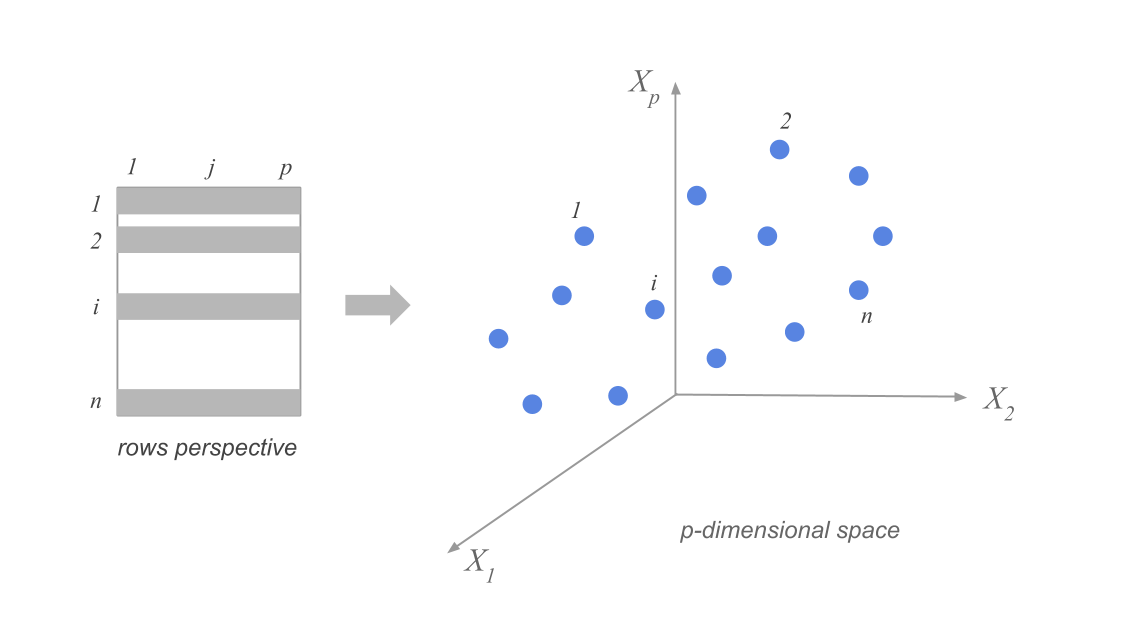

## *Clouds of column-points*

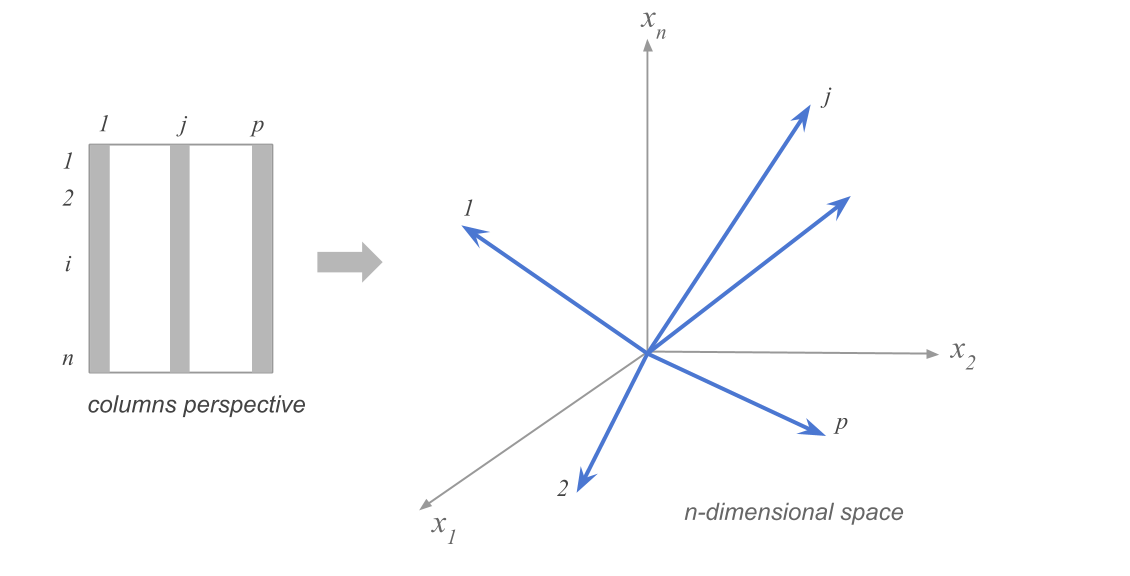

## *Projection onto fewer dimensions*

To visualize data, we need to project it onto 2d (or 3d) subspaces. But
which ones?

These are all equivalent:

-   maximize variance of projected data

-   minimize squared distances between data points and their projections

-   keep distances between points as similar as possible in original vs
    projected space

## *Example in the space of column points*

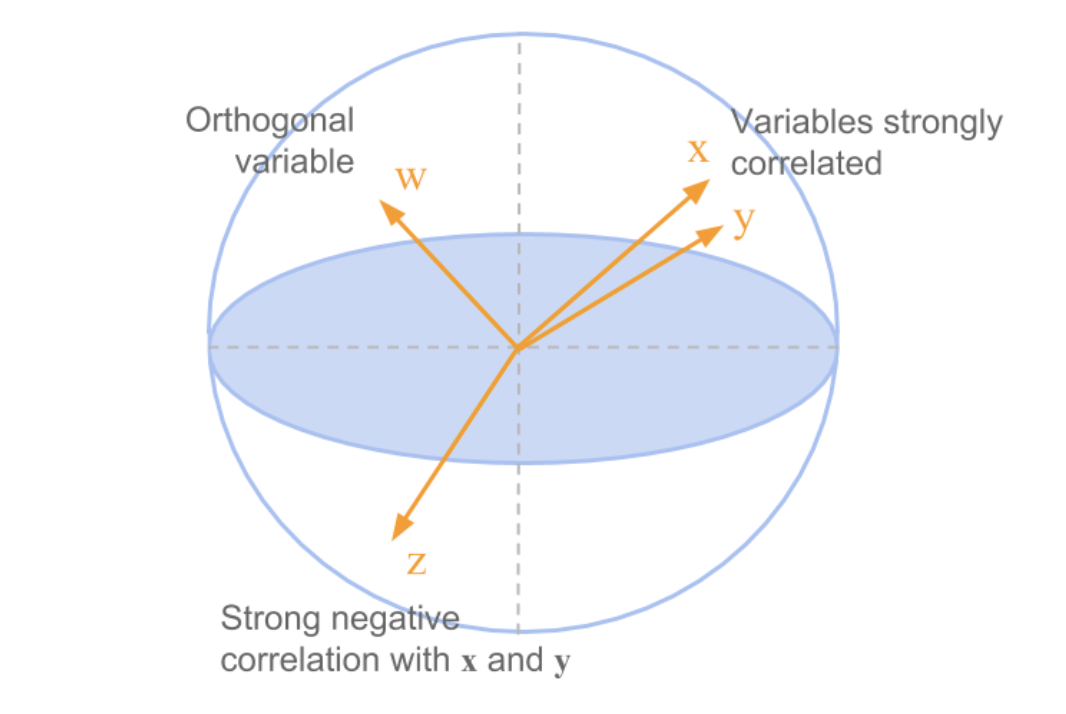

## *Example*

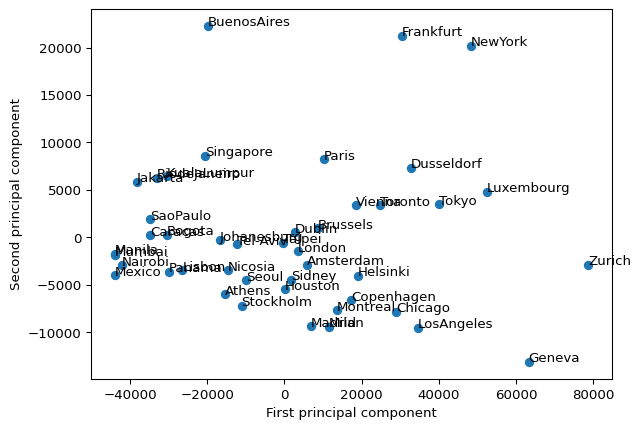

In [3]:
# define the first column of the data as name labels, so that sklearn doesn't use them in the fit
cities_small = cities.iloc[:, [1] + list(range(29, 41))]
# remove rows with NaN values

cities_small.set_index('city', inplace=True)
#names = cities_small['city']
#cities_small = cities_small.drop('city', axis=1)
# standardize the data
cities_small = cities_small.dropna()
cities_small = (cities_small - cities_small.mean(axis=0)) 
cities_small = cities_small.dropna()

# find the first two principal components of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cities_small)
cities_small_pca = pca.transform(cities_small)
# plot the data in the new space, labeling each point with the city name
plt.scatter(cities_small_pca[:, 0], cities_small_pca[:, 1])
for i, city in enumerate(cities_small.index):
  plt.text(cities_small_pca[i, 0], cities_small_pca[i, 1], str(city))
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

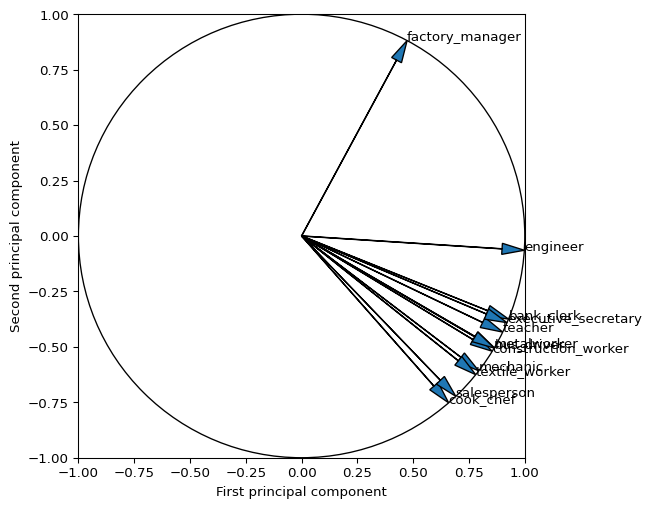

In [4]:
# make a circle plot of the correlations between the original features in the direction of the two principal components
plt.figure(figsize=(6,6))
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False))
# normalize the lengths of the arrows

components = pca.components_[0:2,:]
# normalize the lengths of the components along the second dimension


components = components / np.linalg.norm(components,axis=0)

for i, feature in enumerate(cities_small.columns):
  plt.arrow(0, 0, components[0, i], components[1, i], head_width=0.05, head_length=0.1, length_includes_head=True)
  plt.text(components[0, i], components[1, i], feature)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

We’d like to know in which directions in $R^p$ the data has the highest
variance.

. . .

First: understand how much the data is spread out along a particular
direction, given by a unit vector $\mathbf{u}$.

. . .

Remember, for each point $\mathbf{x}_i$ in the data, we can project it
onto the direction $\mathbf{u}$ by computing
$\psi_i = \mathbf{x}_i \cdot \mathbf{u}$.

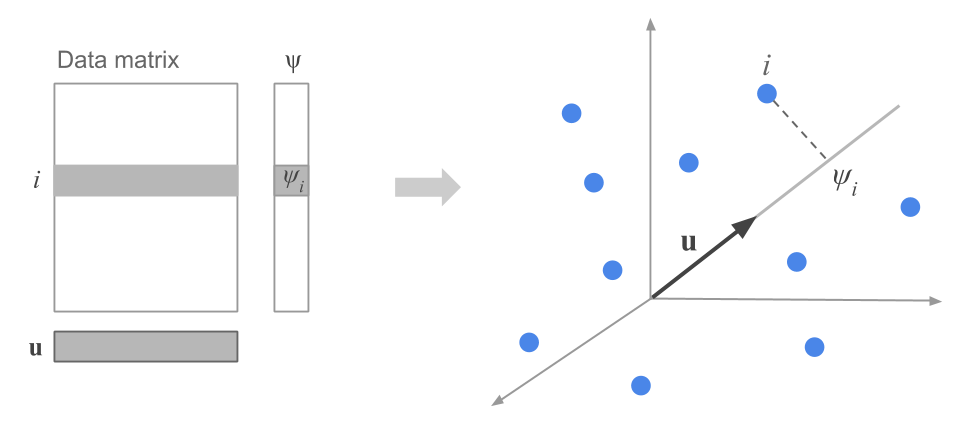

. . .

We then define the vector of all the projected points as
$\mathbf{\psi} = X \mathbf{u}$.

. . .

What is the variance of the projected data? Since the data has been
centered, the variance is given by
$\frac{1}{n} \sum_{i=1}^n v_i^2 = \frac{1}{n} \mathbf{v}^T \mathbf{v}$.

. . .

We can rewrite this in terms of the original data matrix as
$\frac{1}{n} \mathbf{v}^T \mathbf{v} = \frac{1}{n} \mathbf{u}^T X^T X \mathbf{u}$.

We recognize that $X^T X$ is the covariance matrix of the data.

. . .

So the variance of the projected data is given by
$\mathbf{u}^T C \mathbf{u}$, where $C = \frac{1}{n} X^T X$ is the
covariance matrix of the data.

## *Direction of maximum variance*

To find the direction of maximum variance, we need to find the unit
vector $\mathbf{u}$ that maximizes $\mathbf{u}^T C \mathbf{u}$.

. . . ::: notes We start by finding the eigendecomposition of the
covariance matrix $C$: $C = V \Lambda V^T$.

$V$ is a matrix whose columns are the eigenvectors of $C$, and $\Lambda$
is a diagonal matrix whose diagonal elements are the eigenvalues of $C$.

(Note that these are simply the right singular vectors and singular
values of the data matrix $X$.)

Then we can express $\mathbf{u}$ in terms of the eigenvectors of $C$:
$\mathbf{u} = \sum_{i=1}^p a_i \mathbf{v}_i$, where $\mathbf{v}_i$ are
the eigenvectors of $C$. Because $\mathbf{u}$ is a unit vector, the
coefficients $a_i$ must sum to 1.

Now we have that
$C \mathbf{u} = \sum_{i=1}^p C v_i a_i =  \sum_{i=1}^p a_i v_i$, where
$\lambda_i$ are the eigenvalues of $C$.

So then
$\mathbf{u}^T C \mathbf{u} = \sum_{i,j=1}^p a_i a_j \mathbf{v_j}\mathbf{v_j} = \sum_{i,j=1}^p a_i a_j \delta_{i,j}||v_i||  \lambda_i = \sum_{i=1}^p a_i^2 \lambda_i$.
:::

## *Which direction gives the maximum variance?*

*pause*

. . .

The first principal component of a data matrix $X$ is the eigenvector
corresponding to the largest eigenvalue of the covariance matrix of the
data.

In terms of the singular value decomposition of $X$, the first principal
component is the first right singular vector of $X$:

$\mathbf{v_1}$.

The variance of the data along each principal component is given by the
corresponding eigenvalue, or the square of the corresponding singular
value.

## *Example dataset: shopping baskets*

In [5]:
# load in the data from the url, using pandas
import pandas as pd
url = 'my_basket.csv'
food = pd.read_csv(url).T
# name the first column 'name'

food.index.names=['name ']
#food.set_index('name', inplace=True)
food.head()

5 rows × 2000 columns

## 

The data consist of 2000 observations of 42 variables each! The
variables are the number of times each of 42 different food items was
purchased in a particular shopping trip.

Let’s try visualizing the data in a few of the dimensions of the
original space.

. . .

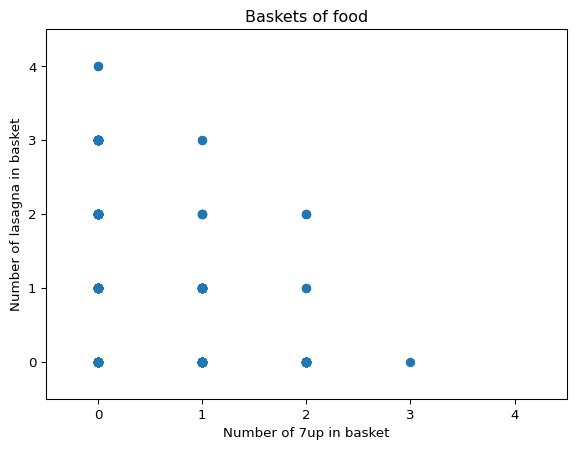

In [6]:
# make a scatterplot of the first two columns in the original dataset
plt.scatter(food.iloc[0,:], food.iloc[1,:])
plt.xlabel(f'Number of {food.index[0]} in basket')
plt.ylabel(f'Number of {food.index[1]} in basket')
# calculate the number of observations where the first two coluimns both equal 2.0
# increase the max x and max y by 0.5
plt.xlim(-.5, 4.5)
plt.ylim(-0.5, 4.5)
plt.title('Baskets of food')
plt.show()


##

In [7]:
# make a scatterplot of the first two columns in the original dataset
def plot_food_scatter(food, x_col, y_col, ax2=None):
  if ax2 is None:
    no_ax_in = True
    fig = plt.figure(figsize=(10,5))
    ax2 = fig.add_subplot(111, projection='3d')
  else:
    no_ax_in = False
  
  yval = np.zeros([10,10])
  for i in range(4):
    for j in range(5):
      yval[i,j] = sum((food.iloc[x_col, :] == i) & (food.iloc[y_col, :] == j))
  

  xpos, ypos = np.meshgrid(range(4), range(5), indexing='ij')
  xpos = xpos.flatten()
  ypos = ypos.flatten()
  zpos = np.zeros_like(xpos)
  dz = yval[0:4, 0:5].flatten()
  dx = dy = 0.5
  ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)
  plt.xlabel(f'# of {food.index[x_col]}')
  plt.ylabel(f'# of {food.index[y_col]}')
  # hide the ticks
  ax2.set_xticks([])
  ax2.set_yticks([])
  # make the spacing tight

  if no_ax_in:
    plt.show()

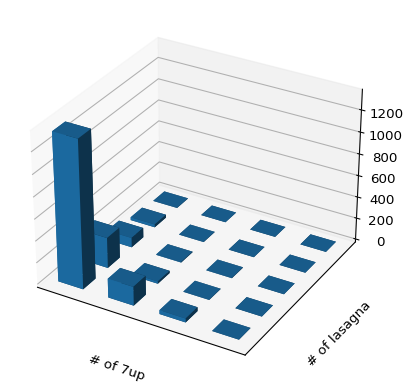

In [8]:
plot_food_scatter(food, 0, 1)

## 

We can look at many combinations…

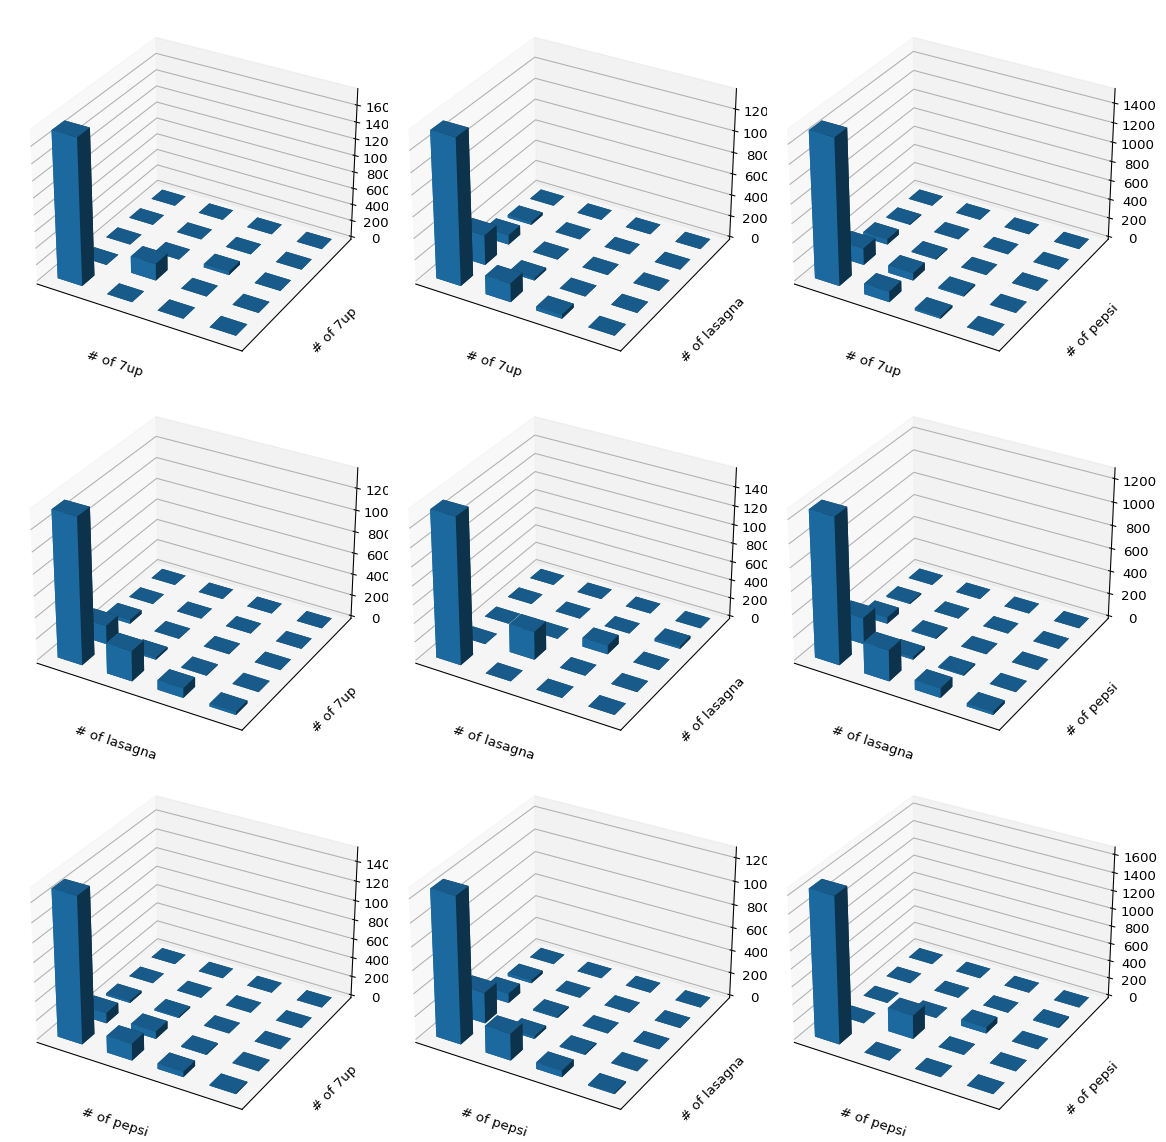

In [9]:
fig = plt.figure(figsize=(12,12))
for i in range(3):
  for j in range(3):
    ax = fig.add_subplot(3,3,3*i+j+1,projection='3d')
    plot_food_scatter(food, i, j, ax)
plt.tight_layout()
plt.show()

## 

Maybe we can learn more from the correlations?

. . .

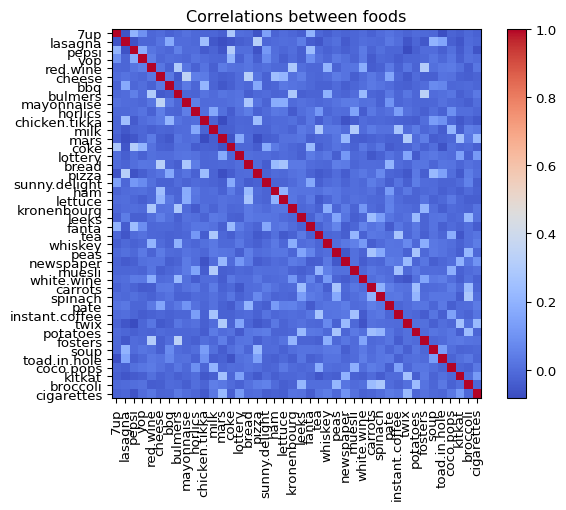

In [10]:
# make a heatmap of the correlations between the columns in the original dataset
plt.imshow(food.T.corr(), cmap='coolwarm', interpolation='none')
plt.xticks(range(42), food.index, rotation=90)
plt.yticks(range(42), food.index)
plt.colorbar()
plt.title('Correlations between foods')
plt.show()

##

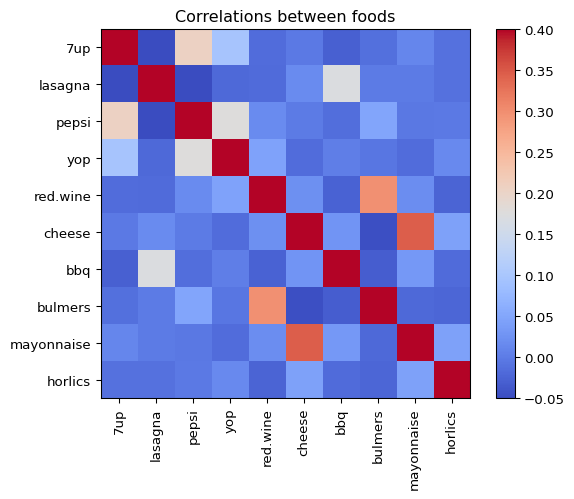

In [11]:
# take just the first 10 foods
food_small = food.iloc[0:10]
# set the range of the colormap to be -0.05 to 0.4
plt.imshow(food_small.T.corr(), cmap='coolwarm', interpolation='none', vmin=-0.05, vmax=0.4)
plt.xticks(range(10), food_small.index, rotation=90)
plt.yticks(range(10), food_small.index)
plt.colorbar()
plt.title('Correlations between foods')
plt.show()

. . .

OK, it looks like there are some patterns here. But it’s hard to get a
real sense for it.

## 

Now perform PCA on the data.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# standardize the data
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food)
# find the first four principal components of the data
pca = PCA(n_components=4)
pca.fit(food_scaled);
print(f'Explained variance %: {pca.explained_variance_ratio_*100}')

Explained variance %: [8.82557344 8.35536632 7.78271494 5.81231635]

In [14]:
import plotly.express as px
import plotly.io as pio

##

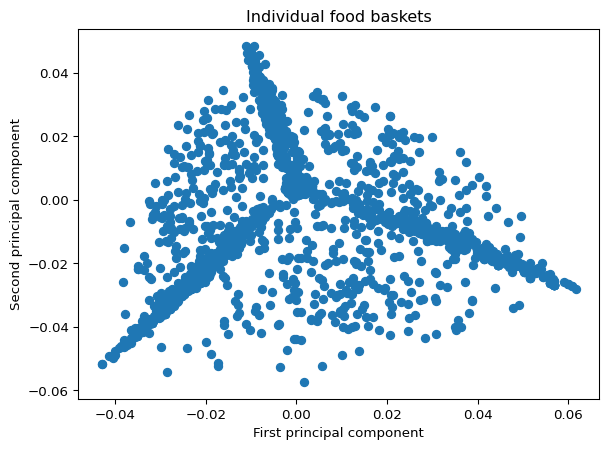

In [15]:
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Individual food baskets')
plt.show()

*pause*

##

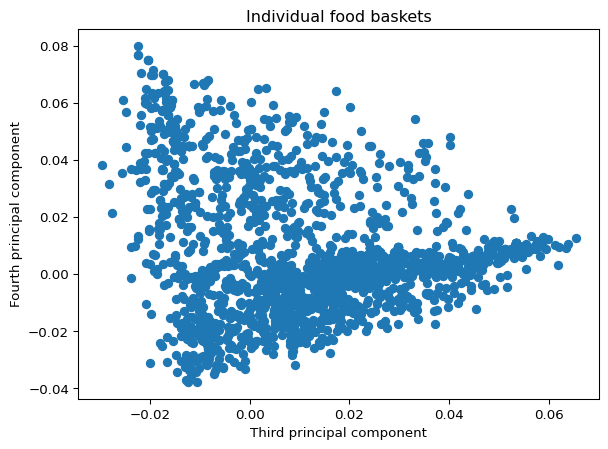

In [16]:
plt.scatter(pca.components_[2], pca.components_[3])
plt.xlabel('Third principal component')
plt.ylabel('Fourth principal component')
plt.title('Individual food baskets')
plt.show()

## *Meaning of the principal components*

In [17]:
food_pca = pd.DataFrame(pca.transform(food_scaled))
food_pca.columns=["Principal Component 1","Principal Component 2","Principal Component 3","Principal Component 4"]
food_pca.index = food.index

In [18]:
fig = px.scatter(food_pca, x="Principal Component 1", y="Principal Component 2" ,template="simple_white", text=food.index)
fig.update_traces(textposition='top center')
fig.show()

##

In [19]:
# plot just the first principal component
# sort by the first principal component
def plot_by_pci(i):
  food_sorted = food_pca.sort_values(by=f'Principal Component {i}')
  fig=px.bar(food_sorted, x=f'Principal Component {i}', text=food_sorted.index, orientation='h',color=f'Principal Component {np.mod(i+2,2)+1}', template='simple_white')
  #fig.xticks(rotation=90)
  #fig.ylabel('Projection on first principal component')
  fig.update_layout(yaxis={'visible': False, 'showticklabels': False}, xaxis={'visible': True, 'showticklabels': True})
  fig.show()

In [20]:
plot_by_pci(1)

##

In [21]:
plot_by_pci(2)

# *Some real-world data*

From
[here](https://github.com/sakshamg94/PCA-genome-data/blob/master/PCA_genomes.ipynb)

In [22]:
def readAndProcessData():
    """
        Function to read the raw text file into a dataframe and keeping the population, gender separate from the genetic data
        
        We also calculate the population mode for each attribute or trait (columns)
        Note that mode is just the most frequently occuring trait
        
        return: dataframe (df), modal traits (modes), population and gender for each individual row
    """
    
    df = pd.read_csv('p4dataset2020.txt', header=None, delim_whitespace=True)
    gender = df[1]
    population = df[2]
    print(np.unique(population))
    
    df.drop(df.columns[[0, 1, 2]],axis=1,inplace=True)
    modes = np.array(df.mode().values[0,:])
    return df, modes, population, gender


In [23]:
df, modes, population, gender = readAndProcessData()

['ACB' 'ASW' 'ESN' 'GWD' 'LWK' 'MSL' 'YRI']

##

In [24]:
df.head()

5 rows × 10101 columns

. . .

In [25]:
def convertDfToMatrix(df, mode):
    """
        Create a binary matrix (binarized) representing mutations away from mode
        Each row is for an individual, and each column is a trait
        
        binarized_{i,j}= 0 if the $i^{th}$ individual has column 
        $j$’s mode nucleobase for his or her $j^{th}$ nucleobase, 
        and binarized_{i,j}= 1 otherwise
    """
    
    raw_np = df.to_numpy()
    binarized = np.where(raw_np!=modes, 1, 0)
    return binarized

##

In [26]:
X = pd.DataFrame(convertDfToMatrix(df, modes))
X.head()

5 rows × 10101 columns

##

In [27]:
pca = PCA(n_components=6)
pca.fit(X);
#Data points projected along the principal components

In [28]:
projected = pca.transform(X)
projected = pd.DataFrame(projected)
projected.columns=map(lambda x: f'PC{x+1}', range(6))
# append the population
projected['population'] = population
projected['gender'] = gender
projected.head()

In [29]:
fig = px.scatter(projected, x='PC3', y='PC4', template='simple_white')
fig.show()

In [30]:
fig = px.scatter(projected, x='PC3', y='PC4', template='simple_white',color='population')
fig.show()